## EDA

In [33]:
# Extracting the Zipfile in which i have my csv File

import zipfile

file = zipfile.ZipFile("C:\\Users\\User\\Desktop\\All Files\\Everything Data\\Analysis Folder\\Python Analysed Dataset\\1\\Project1.zip", "r")

file.extractall("Project 1")

In [34]:
import os
os.getcwd()

'c:\\Users\\User\\Desktop\\All Files\\Everything Data\\Analysis Folder\\Python Analysed Dataset\\1'

In [35]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt

In [37]:
import numpy as np

In [38]:
import seaborn as sns

In [39]:
os.getcwd()

'c:\\Users\\User\\Desktop\\All Files\\Everything Data\\Analysis Folder\\Python Analysed Dataset\\1'

In [40]:
# Using Panda lib to open the csv file i want 

dataset = pd.read_csv("C:\\Users\\User\\Desktop\\All Files\\Everything Data\\Analysis Folder\\Python Analysed Dataset\\1\\Project 1\\index.csv")

In [41]:
# Checking the data to understand the data

dataset.head()


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [42]:
# Checking for the length of the data

len(dataset)

2623

In [43]:
# Checking for the Numbers of Rows and column

dataset.shape

(2623, 6)

In [44]:
# Checking For Duplicate (FOUND ZERO)

dataset.duplicated().unique()

array([False])

In [45]:
# Created a function for creating a time column
def find_time(x):

    items = x.split(" ")[1]

    return items.split(":")[0]+":00"

# Creating The Time Column
dataset["Time"] = dataset["datetime"].apply(find_time)

# Checking The Time Column Unique Value
dataset["Time"].unique()

array(['10:00', '12:00', '13:00', '15:00', '16:00', '18:00', '19:00',
       '11:00', '14:00', '17:00', '09:00', '07:00', '20:00', '08:00',
       '22:00', '21:00'], dtype=object)

In [46]:
# Creating a function to split text item in a column

def find_month(x):

    return x.split("-")[1]


# Creating a Month column by applying the function created
dataset["Month"] = dataset["date"].apply(find_month)


# checking for the unique months 
dataset["Month"].unique()



array(['03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
      dtype=object)

In [47]:
# A FUNCTION TO CHANGE THE MONTH COLUMN TO WORDS IN PLACE OF THE DIGITS

def month_to_words(x):

    if x == 1:
        return "January"
    elif x == 2:
        return "Febuary"
    elif x == 3:
        return "March"
    elif x == 4:
        return "April"
    elif x == 5:
        return "May"
    elif x == 6:
        return "June"
    elif x == 7:
        return "July"
    elif x == 8:
        return "August"
    elif x == 9:
        return "September"
    elif x == 10:
        return "October"
    elif x == 11:
        return "November"
    elif x == 12:
        return "December"
    
# Changing the month column data type
dataset["Month"] = dataset["Month"].astype(int)

# replacing the values in the month column 
dataset["Month"] = dataset["Month"].apply(month_to_words)

# checking for the unique of the replaced value
dataset["Month"].unique()

array(['March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'], dtype=object)

<Axes: title={'center': 'COUNT OF ORDER BY COFFEE_NAME'}, xlabel='Coffee Name', ylabel='Order Count'>

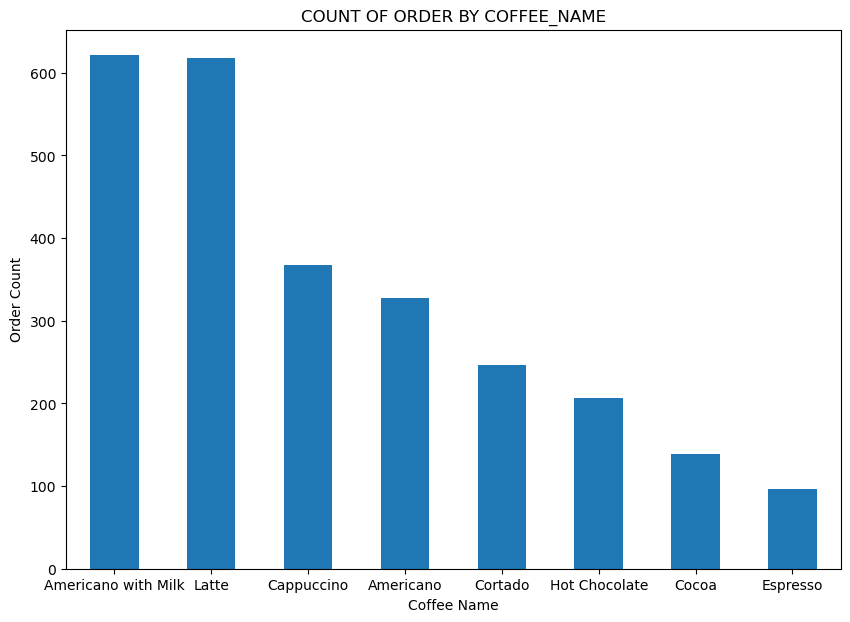

In [48]:
# FINDING THE COUNT OF ORDER BY COFFEE NAME TO SEE WHICH COFFEE IS PERFORMING WELL AND THE ONES PERFORMING POORLY

dataset["coffee_name"].value_counts().plot(kind="bar",title ="COUNT OF ORDER BY COFFEE_NAME",xlabel="Coffee Name",ylabel="Order Count", rot= "horizontal", figsize=(10,7))

<Axes: title={'center': 'COUNT OF ORDER BY TIME'}, xlabel='Count Of Order', ylabel='Time Of Order'>

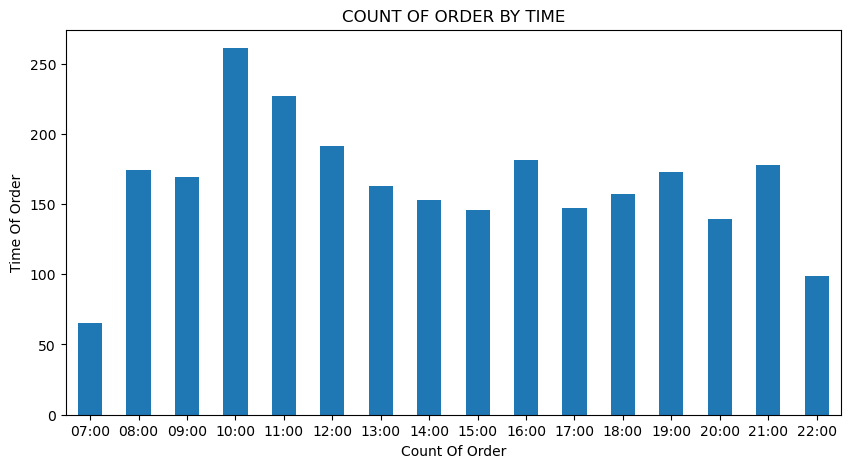

In [68]:
# FINDING THE COUNT OF ORDER BY TIME OF THE DAY TO KNOW WHICH TIME OF THE DAY PEOPLE TEND TO ORDER THE MOST AND THE TIME WHERE PEOPLE TEND NOT TO ORDER MUCH

dataset.groupby("Time")["coffee_name"].count().plot(kind = "bar",rot="horizontal", figsize=(10,5), xlabel="Count Of Order", ylabel= "Time Of Order",title="COUNT OF ORDER BY TIME")

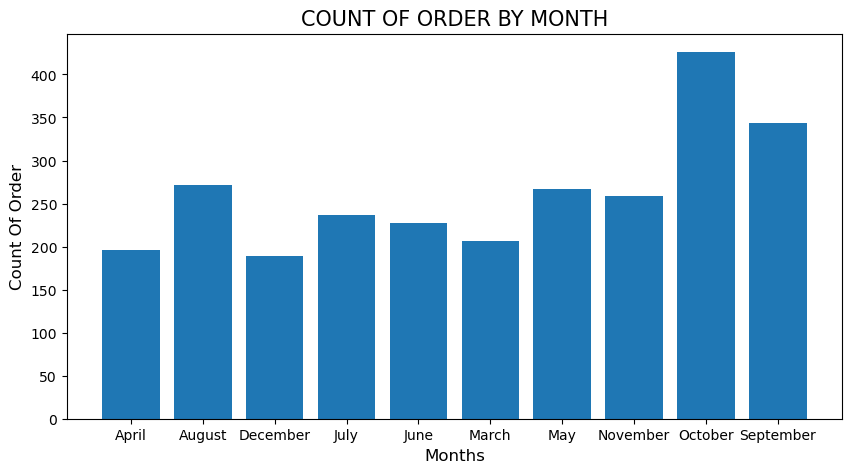

In [50]:
%matplotlib inline
# PLOTTING THE COUNT OF ORDER BY MONTH
x_axis = dataset.groupby("Month")["Month"].count().index
y_axis = dataset.groupby("Month")["Month"].count()

plt.figure(figsize = (10,5))
plt.title("COUNT OF ORDER BY MONTH", size = 15)
plt.xlabel("Months", size = 12)
plt.ylabel("Count Of Order", size = 12)
plt.bar(x_axis,y_axis)
plt.show()

In [51]:
# CHECKING TO SEE IF THE AMOUNT COUNT OF ORDER INFLUENCE THE INCOME

dataset.groupby("coffee_name")["money"].mean().index
dataset.groupby("coffee_name")["money"].mean()
dataset.groupby("coffee_name")["coffee_name"].count()


coffee_name
Americano              327
Americano with Milk    621
Cappuccino             368
Cocoa                  139
Cortado                247
Espresso                97
Hot Chocolate          206
Latte                  618
Name: coffee_name, dtype: int64

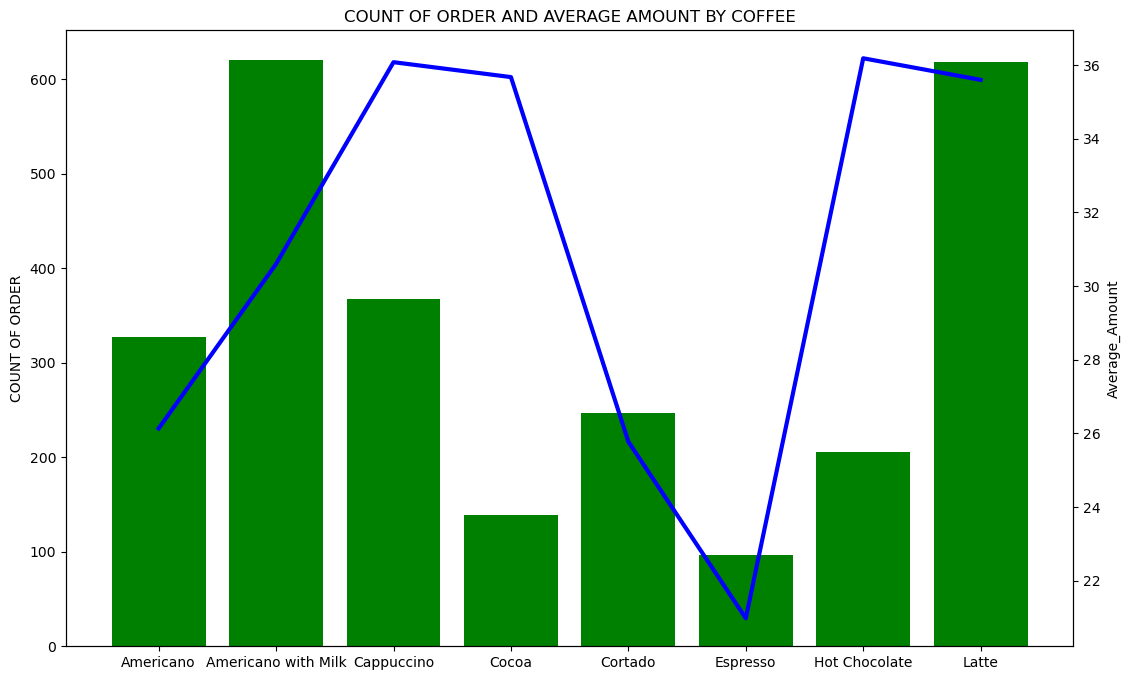

In [72]:
# CHECKING TO SEE IF THE AMOUNT INFLUENCE COUNT OF ORDER THE INCOME

fig, ax1 = plt.subplots(figsize = (13,8))
ax2 = ax1.twinx()
plt.title("COUNT OF ORDER AND AVERAGE AMOUNT BY COFFEE")
ax1.bar(dataset.groupby("coffee_name")["money"].mean().index,dataset.groupby("coffee_name")["coffee_name"].count(), color = "g")
ax2.plot(dataset.groupby("coffee_name")["money"].mean().index,dataset.groupby("coffee_name")["money"].mean(),"b-",lw=3,)
ax1.set_ylabel("COUNT OF ORDER")
ax2.set_ylabel("Average_Amount")
plt.show()


In [74]:
# dataset = dataset.drop_duplicates(keep=False)

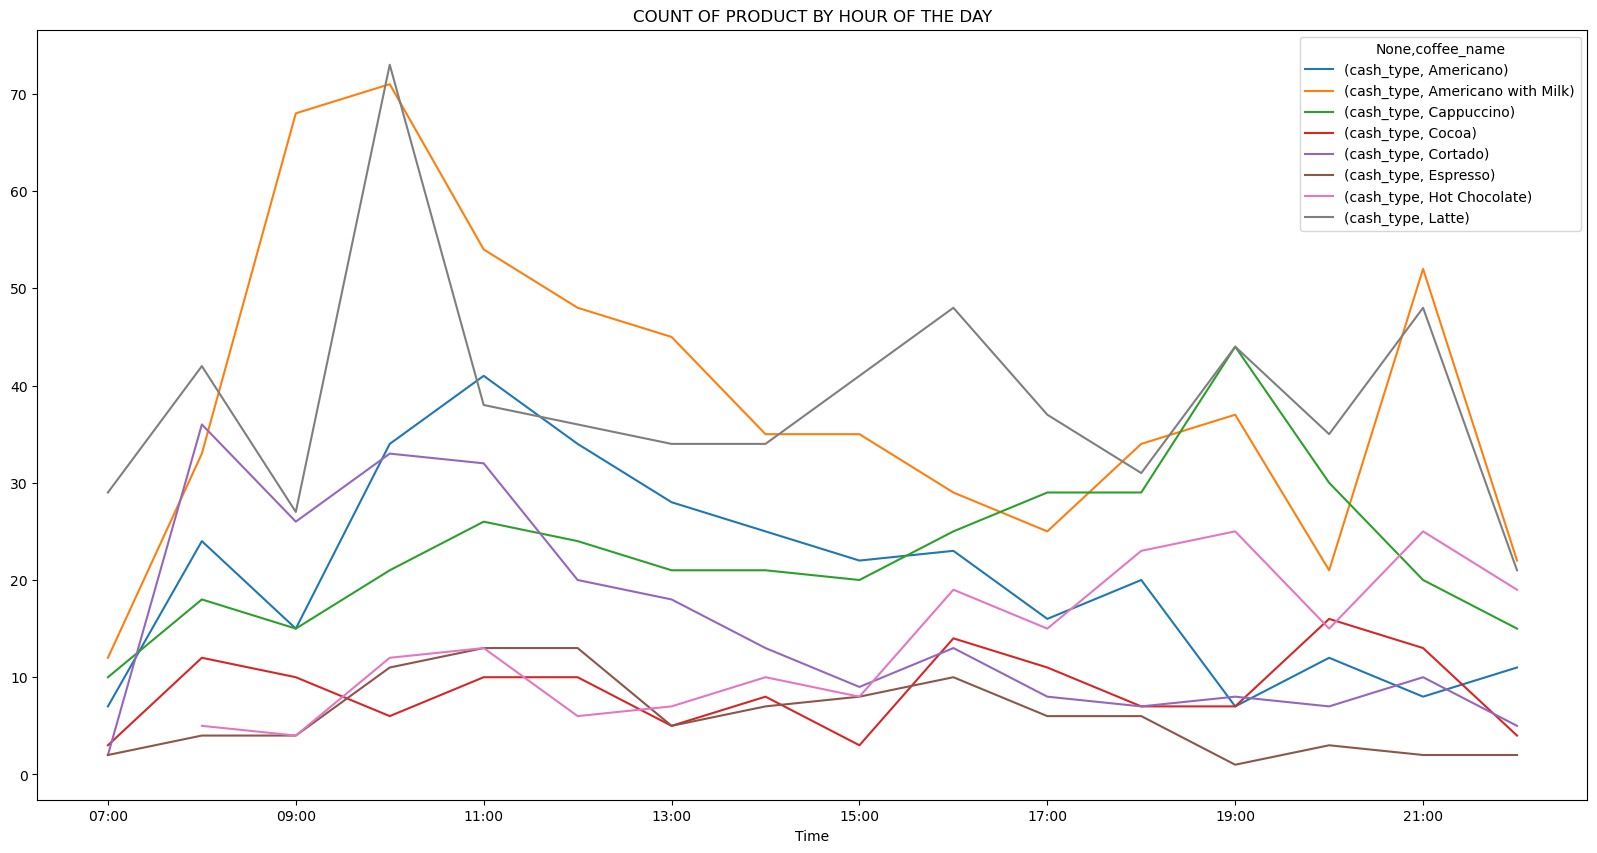

In [75]:
pivot = dataset.pivot_table(index = ["Time"], columns= ["coffee_name"], values=["cash_type"],aggfunc = "count").plot(kind = "line", figsize=(20,10), legend = True, title= "COUNT OF PRODUCT BY HOUR OF THE DAY" )
pivot
plt.show()

In [55]:
#### INSIGHT ON THE ABOVE CHART

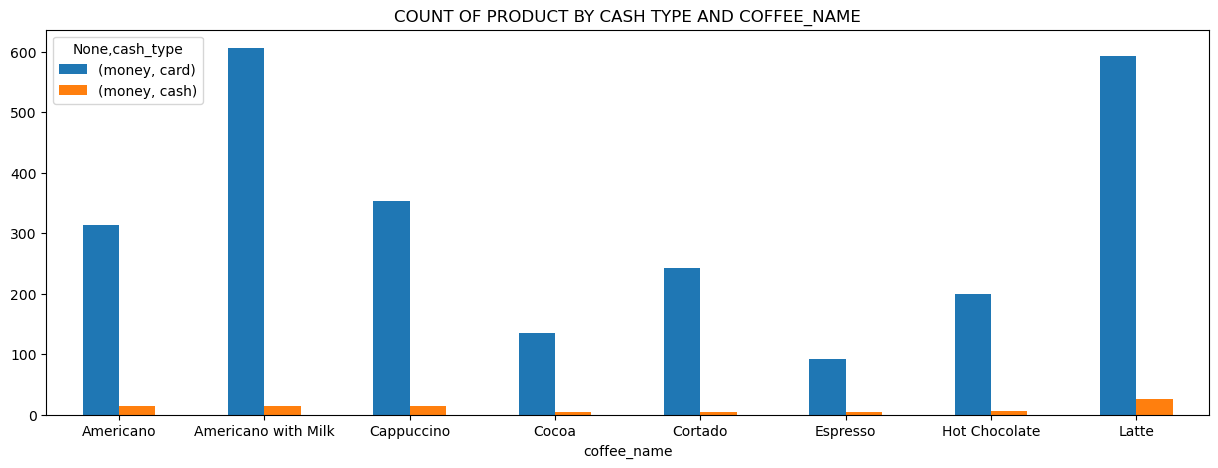

In [81]:
pivot_2 = dataset.pivot_table(index = ["coffee_name"], columns = ["cash_type"], values = ["money"], aggfunc = "count")
pivot_2.plot(kind="bar", title = "COUNT OF PRODUCT BY CASH TYPE AND COFFEE_NAME", rot = "horizontal", figsize= (15,5))
plt.show()

In [57]:
#### INSIGHT ON THE ABOVE CHART

<Axes: title={'center': 'TOTAL PROFIT BY MONTH AND CASH TYPE'}, xlabel='Months', ylabel='Total Profit'>

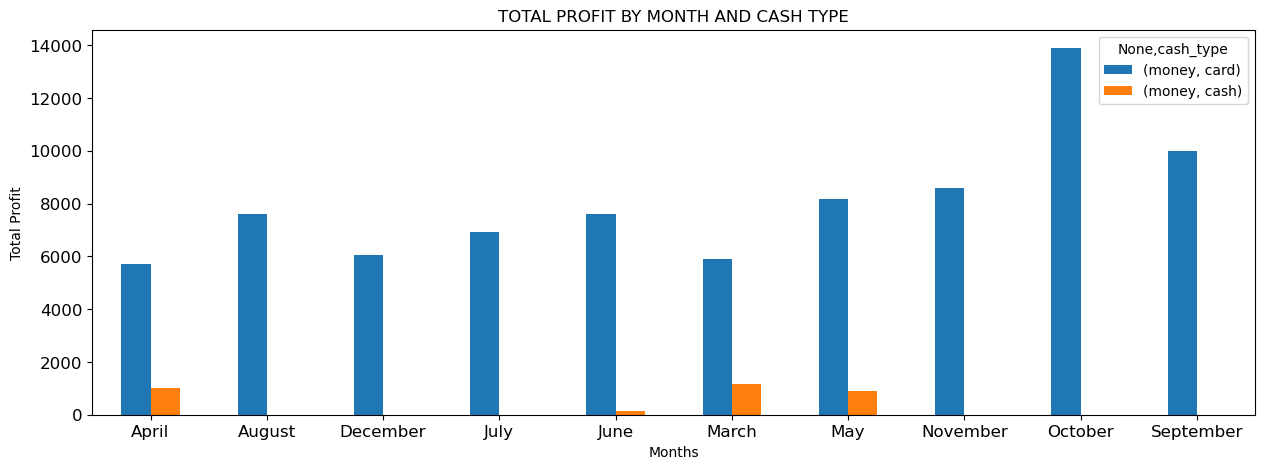

In [82]:
pivot_3 = dataset.pivot_table(index = ["Month"], columns = ["cash_type"], values = ["money"], aggfunc = "sum")

pivot_3.plot(kind = "bar", title= "TOTAL PROFIT BY MONTH AND CASH TYPE", xlabel = "Months", ylabel= "Total Profit", fontsize=12, rot = "horizontal",figsize = (15,5))

In [59]:
#### INSIGHT ON THE ABOVE CHART

In [60]:
# pivot_4 = dataset.pivot_table(index = ["coffee_name"], values = ["money"], aggfunc = ["sum"])

# pivot_4.plot(kind = "bar")

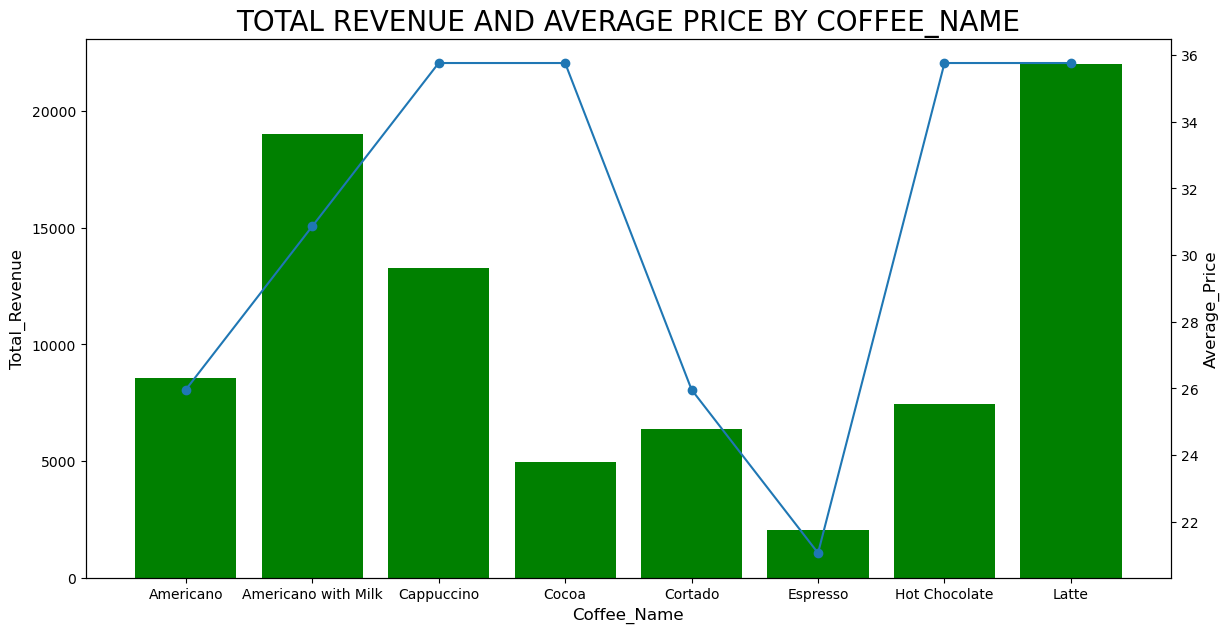

In [96]:
%matplotlib inline

dataset.groupby("coffee_name")["money"].sum().index
dataset.groupby("coffee_name")["money"].sum()
dataset.groupby("coffee_name")["money"].mean()

fig, ax1 = plt.subplots(figsize = (14,7))
ax2 = ax1.twinx()
ax1.bar(dataset.groupby("coffee_name")["money"].sum().index,dataset.groupby("coffee_name")["money"].sum(), color = "g")
ax2.plot(dataset.groupby("coffee_name")["money"].sum().index,dataset.groupby("coffee_name")["money"].median(), "-o" )
plt.title("TOTAL REVENUE AND AVERAGE PRICE BY COFFEE_NAME", size = 20)
ax1.set_xlabel("Coffee_Name", size = 12)
ax1.set_ylabel("Total_Revenue",size = 12)
ax2.set_ylabel("Average_Price", size = 12)
plt.show()

In [97]:
dataset_sorted_by_money = dataset.sort_values("money", ascending= True)

In [98]:
# rename the columns and make them upper case

In [ ]:
dataset_sorted_by_money

,date,datetime,cash_type,card,money,coffee_name,Time,Month
1490,2024-09-07,2024-09-07 16:20:59.312,card,ANON-0000-0000-0012,18.12,Espresso,16:00,September
1470,2024-09-06,2024-09-06 11:23:25.390,card,ANON-0000-0000-0095,18.12,Espresso,11:00,September
1467,2024-09-06,2024-09-06 09:50:39.949,card,ANON-0000-0000-0590,18.12,Espresso,09:00,September
1063,2024-07-27,2024-07-27 12:26:13.159,card,ANON-0000-0000-0040,18.12,Espresso,12:00,July
1095,2024-07-30,2024-07-30 11:13:16.218,card,ANON-0000-0000-0426,18.12,Espresso,11:00,July
...,...,...,...,...,...,...,...,...
81,2024-03-11,2024-03-11 10:18:46.724,cash,NaN,40.00,Latte,10:00,March
311,2024-04-17,2024-04-17 16:13:24.310,cash,NaN,40.00,Cappuccino,16:00,April
76,2024-03-10,2024-03-10 10:06:02.960,cash,NaN,40.00,Latte,10:00,March
278,2024-04-13,2024-04-13 15:07:55.966,cash,NaN,40.00,Hot Chocolate,15:00,April
